In [1]:
import matplotlib.pyplot as plt
import yaml
import numpy as np
import netCDF4

In [8]:
def parse_ncdf(file: str):
    with open(file, "r") as f:
        data = yaml.load(f, yaml.Loader)
    iters = [d["iteration"] for d in data]
    free_energy = [d["mbar_analysis"]["free_energy_in_kT"] for d in data]
    errors = [d["mbar_analysis"]["standard_error_in_kT"] for d in data]
    errors[0] = 0
    throughout = np.mean([d["timing_data"]["ns_per_day"] for d in data])
    throughout
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    ys = [free_energy, errors]
    y_labels = ["free energy / kT", "Standard error / KT"]

    for idx, ax in enumerate(axs.flatten()):
        ax.plot(iters, ys[idx], marker=".")
        ax.set_ylabel(y_labels[idx])
        ax.set_xlabel("iterations")
    plt.show()

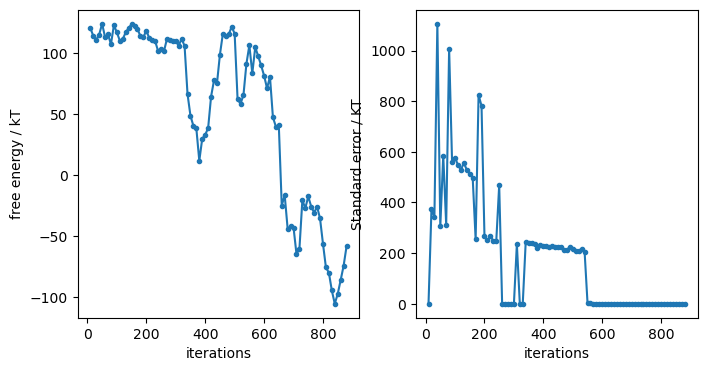

In [9]:
parse_ncdf("../repex_test_ligand_real_time_analysis.yaml")